# ASG 1 QFT Code (Dynoh_S10242384C)

## Importing Required Libraries

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, SamplerV2
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, transpile
from collections import Counter
from qiskit_aer import Aer
from numpy import gcd # Greatest Common Divisor

import matplotlib.pyplot as plt
import numpy as np
import math


# Qiskit built-in function
from qiskit.circuit.library import QFT

%matplotlib inline

## Creating QFT Circuits

In [4]:
# Function to Create QFT circuit
def qft_circuit(num_qubits, insert_barriers=True, measure=True):
    
    qc = QuantumCircuit(num_qubits)
    qft_circuit = QFT(num_qubits, do_swaps=True).decompose()
    qc.compose(qft_circuit, inplace=True)
    
    # Measure Output
    if measure:
        qc.measure_all()
    
    return qc

## Using Built-In Function

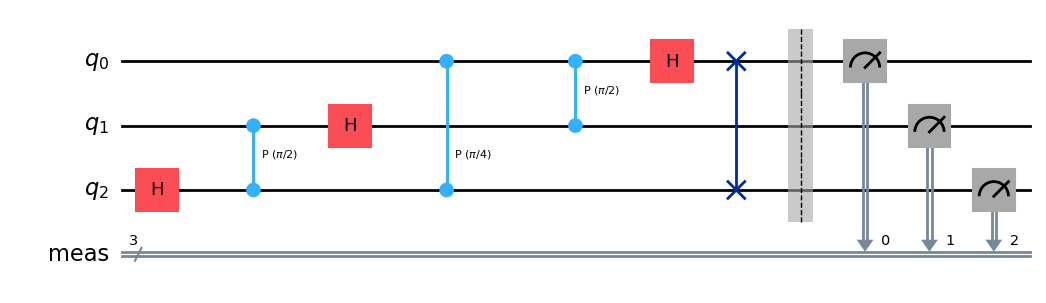

In [5]:
# Define No. of Qubits
num_qubits = 3

# Create and Plot QFT Circuit
qc = qft_circuit(num_qubits)
display(qc.draw('mpl'))

# Simulation of Circuit
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()

# Plotting Results
plot_histogram(counts)
plt.show()

## Using IBM Quantum

In [6]:
#IBM Quantum Account Credentials
QiskitRuntimeService.save_account(
    channel="ibm_quantum", 
    token="31bfe354e4c4037cc5f3e89a140702d671cd0a107fff32cfd70062a1cd206e436ea4ddbed3904cbdb7f8c7d04976b7362375f20d3d6cdba18223c4f0885f5e7c",
    overwrite=True
)

In [7]:
# Load Service
service = QiskitRuntimeService()

# Check Available Backends
backends = service.backends()
for backend in backends:
    print(f"Backend: {backend.name}, Qubits: {backend.num_qubits}")

Backend: ibm_brisbane, Qubits: 127
Backend: ibm_kyiv, Qubits: 127
Backend: ibm_sherbrooke, Qubits: 127


In [ ]:
# Selecting Backend to run Quantum Formula on
backend = service.backend("ibm_brisbane")

# Transpile the circuit (Hadamard "H" converted to "RZ + CX" because the backend doesn’t support H)
qc_transpiled = transpile(qc, backend)

# Use Sampler Primitive
sampler = SamplerV2(mode=backend)
job = sampler.run([qc_transpiled])

# Monitor Job Status
print("Running QFT circuit...")
result = job.result()
print("Done Running :)")
print(f"Results are as Follows: {result}")

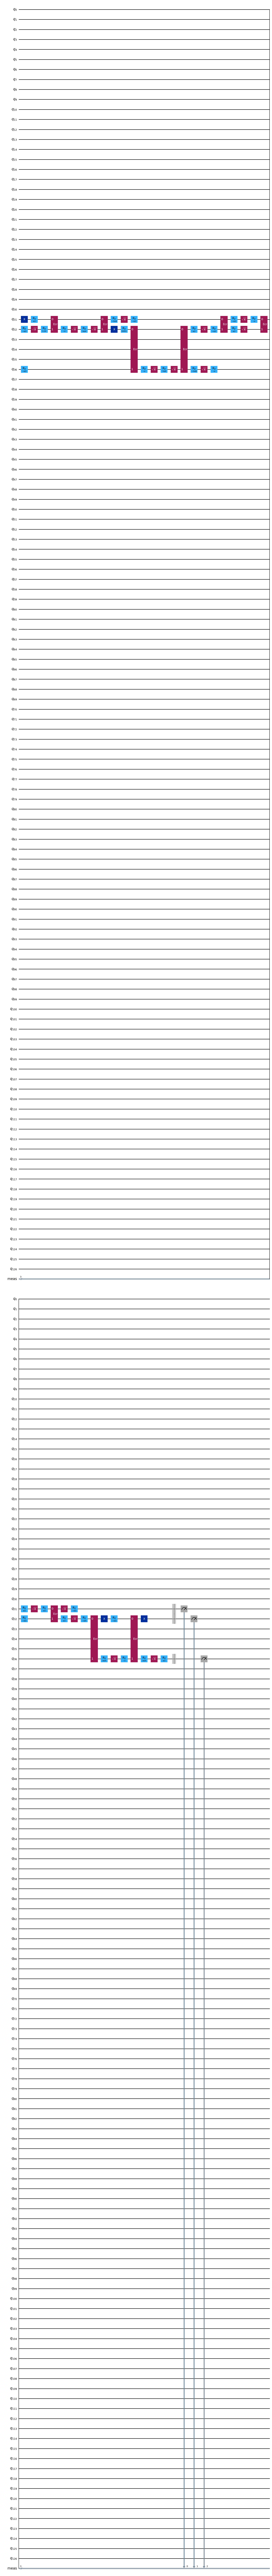

In [58]:
#results from IBM
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
gate rzx(param0) q0,q1 { h q1; cx q0,q1; rz(param0) q1; cx q0,q1; h q1; }
gate ecr q0,q1 { rzx(pi/4) q0,q1; x q0; rzx(-pi/4) q0,q1; }
qreg q[127];
creg meas[3];
x q[31];
rz(pi/2) q[31];
rz(-pi/2) q[32];
sx q[32];
rz(1.2436369077686829) q[32];
ecr q[31],q[32];
rz(-pi) q[32];
sx q[32];
rz(3*pi/4) q[32];
sx q[32];
ecr q[31],q[32];
rz(-3*pi/4) q[31];
sx q[31];
rz(-pi/2) q[31];
x q[32];
rz(0.8509378260699583) q[32];
rz(-pi/2) q[36];
ecr q[32],q[36];
rz(-pi) q[36];
sx q[36];
rz(7*pi/8) q[36];
sx q[36];
ecr q[32],q[36];
rz(pi/2) q[32];
sx q[32];
rz(-pi/2) q[32];
ecr q[31],q[32];
rz(-pi/2) q[31];
sx q[31];
rz(-pi) q[31];
rz(pi/2) q[32];
sx q[32];
ecr q[31],q[32];
rz(pi/2) q[31];
sx q[31];
rz(pi/2) q[31];
rz(-pi/2) q[32];
ecr q[31],q[32];
sx q[31];
rz(-pi/2) q[31];
rz(pi/2) q[32];
sx q[32];
rz(-pi/4) q[32];
rz(-3*pi/8) q[36];
sx q[36];
rz(-pi) q[36];
ecr q[32],q[36];
x q[32];
rz(-pi/2) q[32];
rz(3*pi/4) q[36];
sx q[36];
rz(-pi) q[36];
ecr q[32],q[36];
x q[32];
rz(3*pi/4) q[36];
sx q[36];
rz(pi/2) q[36];
barrier q[31],q[32],q[36];
measure q[31] -> meas[0];
measure q[32] -> meas[1];
measure q[36] -> meas[2];
"""
circuit = QuantumCircuit.from_qasm_str(qasm)
circuit.draw("mpl")

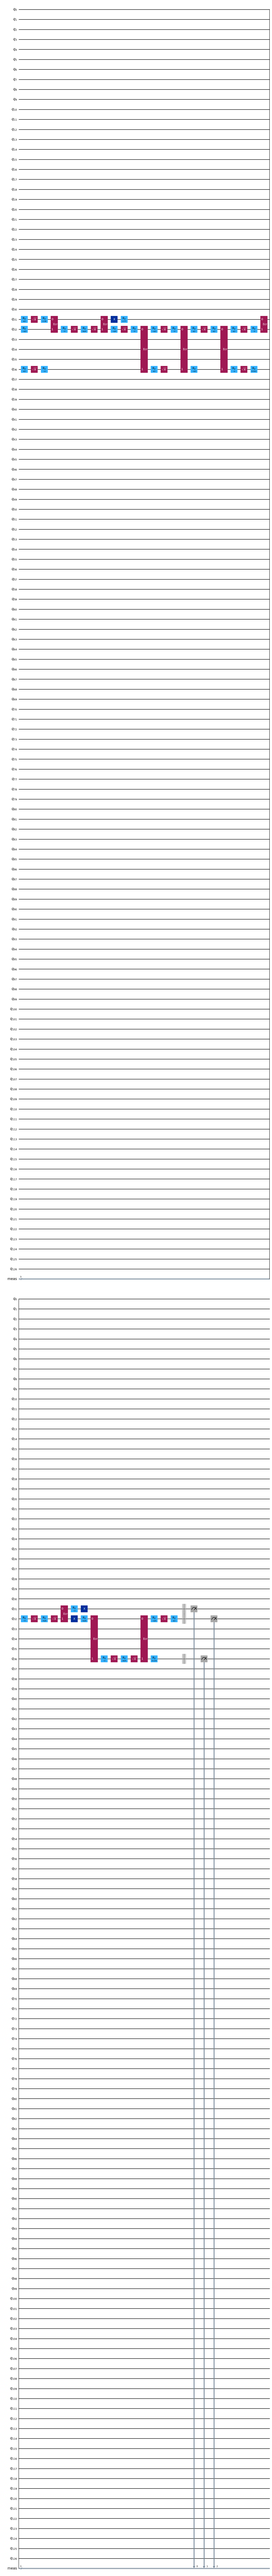

In [8]:
#2nd result from IBM
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
gate rzx(param0) q0,q1 { h q1; cx q0,q1; rz(param0) q1; cx q0,q1; h q1; }
gate ecr q0,q1 { rzx(pi/4) q0,q1; x q0; rzx(-pi/4) q0,q1; }
qreg q[127];
creg meas[3];
rz(pi/2) q[31];
sx q[31];
rz(2.375496990641736) q[31];
rz(-pi/2) q[32];
ecr q[31],q[32];
rz(-pi) q[32];
sx q[32];
rz(3*pi/4) q[32];
sx q[32];
ecr q[31],q[32];
x q[31];
rz(2.7681960723404604) q[31];
rz(-pi/4) q[32];
sx q[32];
rz(-pi) q[32];
rz(pi/2) q[36];
sx q[36];
rz(-pi) q[36];
ecr q[32],q[36];
rz(-pi/2) q[32];
sx q[32];
rz(-pi) q[32];
rz(pi/2) q[36];
sx q[36];
ecr q[32],q[36];
rz(pi/2) q[32];
sx q[32];
rz(pi/2) q[32];
rz(-pi/2) q[36];
ecr q[32],q[36];
rz(pi/2) q[32];
sx q[32];
rz(-pi) q[32];
ecr q[31],q[32];
rz(-pi) q[32];
sx q[32];
rz(7*pi/8) q[32];
sx q[32];
ecr q[31],q[32];
rz(-pi) q[31];
x q[31];
x q[32];
rz(5*pi/8) q[32];
rz(-pi) q[36];
sx q[36];
rz(0.5616778270747655) q[36];
ecr q[32],q[36];
rz(-pi) q[36];
sx q[36];
rz(3*pi/4) q[36];
sx q[36];
ecr q[32],q[36];
rz(-pi/4) q[32];
sx q[32];
rz(pi/2) q[32];
rz(0.22372033632268362) q[36];
barrier q[31],q[36],q[32];
measure q[31] -> meas[0];
measure q[36] -> meas[1];
measure q[32] -> meas[2];
"""
circuit = QuantumCircuit.from_qasm_str(qasm)
circuit.draw("mpl")

In [20]:
# Before Transpiling
# q_0: ───H───X───
# q_1: ───H───X───
# q_2: ───H───────
    
# After Transpiling
# q_0: ───RZ(π/2)──CX──RZ(-π/2)──
# q_1: ───CX──────────────CX──────
# q_2: ───RZ(π/2)──CX──RZ(-π/2)──

## Building Shor's Algorithm

In [2]:
# Create modular exponentiation, a^x mod N
def mod_exp(a, exp, N):
    num_qubits = N.bit_length() + 1  # Ensure the correct number of qubits
    mod_exp_circuit = QuantumCircuit(num_qubits)  # Adjust qubit count

    # Apply Modular Exponentiation Logic (Controlled-X operations)
    for i in range(num_qubits - 1):
        if (exp >> i) & 1:  # Check if the i-th bit of 'exp' is 1
            mod_exp_circuit.cx(i, num_qubits - 1)  # Controlled-X to simulate modular multiplication

    return mod_exp_circuit.to_gate(label=f"ModExp({a}^{exp} mod {N})")  # Convert to a gate


In [3]:
#1 Pre Processing/Order Finding (Finding r for the function: f(x)=a^x mod N)
def classical_part(N):
    a = np.random.randint(2, N)
    factor = math.gcd(a, N)  
    
    if factor != 1:  # If gcd not 1, factor found, Stop function
        print(f"Trivial factor: {factor}")
        return factor, None
    
    print(f"Chosen a = {a}, moving on to quantum step")
    return None, a

In [4]:
#2 Quantum Phase Estimation (QPE) to find the period r.
def qpe_phase_estimation(a, N):
    n_count = 8  # Number of counting qubits
    num_qubits = N.bit_length() + 1  # Ensure proper size
    qc = QuantumCircuit(n_count + num_qubits, n_count)  # Adjust circuit size

    # Apply Hadamard gates to counting qubits
    for qubit in range(n_count):
        qc.h(qubit)

    # Apply Controlled Modular Exponentiation (FIXED)
    for qubit in range(n_count):
        exp = 2 ** qubit
        mod_exp_qgate = mod_exp(a, exp, N)  # Get modular exponentiation gate
        control_qubits = [qubit]  # Counting qubit as control
        target_qubits = list(range(n_count, n_count + num_qubits - 1))  # Adjust target qubits
        qc.append(mod_exp_qgate.control(), control_qubits + target_qubits)  # Apply properly

    # Apply inverse QFT
    qc.append(QFT(n_count).inverse(), range(n_count))

    # Measure counting qubits
    qc.measure(range(n_count), range(n_count))

    return qc

In [5]:
#3 Running QPE with IBM Quantum Backend.
def run_qpe(a, N):
    backend = service.backend("ibm_brisbane")
    qc = qpe_phase_estimation(a, N)

    transpiled_qc = transpile(qc, backend)
    obj = assemble(transpiled_qc)
    result = backend.run(obj).result()
    
    # Get and Plot results
    counts = result.get_counts()
    plot_histogram(counts)

    # Extract most frequent measurement result
    measured_value = max(counts, key=counts.get)
    phase = int(measured_value, 2) / 2**8  # Convert to decimal fraction

    # Extract period r
    r = int(round(1 / phase))
    print(f"Estimated period r = {r}")
    return r

In [6]:
#4 Post Processing (compute factors from period r, r must be even for factorization)
def find_factors(N, a, r):
    if r % 2 != 0:
        return None
    
    x = mod_exp(a, r // 2, N)
    factor1 = math.gcd(x - 1, N)
    factor2 = math.gcd(x + 1, N)

    if factor1 == 1 or factor2 == 1:
        print("Failed to find non-trivial factors")
        return
    
    print(f"Factors of {N} are: {factor1} and {factor2}")
    return factor1, factor2

In [7]:
#5 Building Shor's algorithm
def shors_algorithm(N):
    print(f"Factoring {N} using Shor's Algorithm")
    print("---------------------------------------")

    # Step 1: Classical Preprocessing
    factor, a = classical_part(N)
    if factor:
        return factor, N // factor

    # Step 2: Quantum Phase Estimation
    r = run_qpe(a, N)

    # Step 3: Use Classical Math to Compute Factors
    return find_factors(N, a, r)

In [41]:
# Testing Shor's Algortithm on numbers ranging from 2-5 digits
shors_algorithm(15) #ANS: 5,3

Factoring 15 using Shor's Algorithm
---------------------------------------
Trivial factor: 3


(3, 5)

In [47]:
shors_algorithm(221) #ANS: 13,17

Factoring 221 using Shor's Algorithm
---------------------------------------
Trivial factor: 13


(13, 17)

In [60]:
shors_algorithm(687) #ANS: 3,229

Factoring 687 using Shor's Algorithm
---------------------------------------
Trivial factor: 3


(3, 229)

In [91]:
shors_algorithm(2407)#ANS: 29,83

Factoring 2407 using Shor's Algorithm
---------------------------------------
Trivial factor: 29


(29, 83)

In [ ]:
#Disclaimer: Got to run multiple times to work (QPE cannot fix)

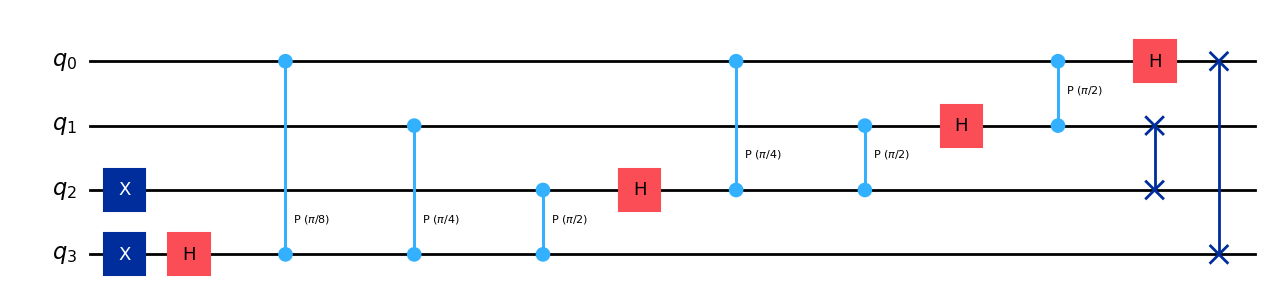

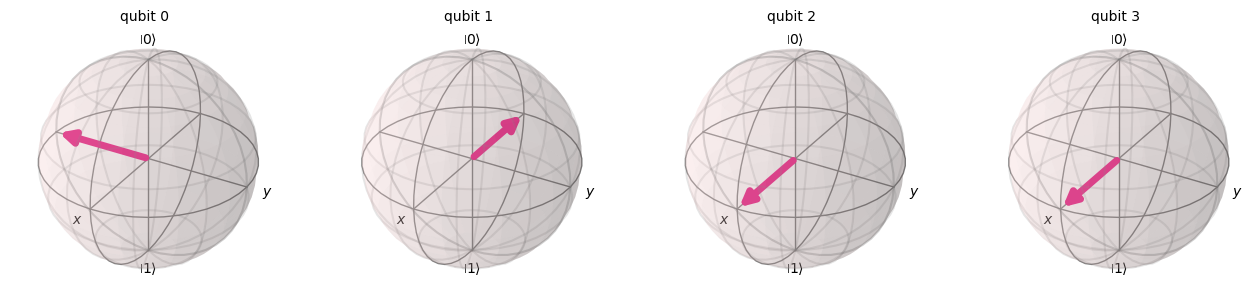

<IPython.core.display.Latex object>

In [12]:
#https://medium.com/@marcell.ujlaki/exploring-quantum-computing-demystifying-quantum-fourier-transformations-unveiling-the-math-with-5d74f3f8025f
import numpy as np
from numpy import pi
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import circuit_drawer

def qft_rotations(circuit, n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n) # CROT from qubit n to the actual qubit
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

def qc_init(number):
    binary = bin(number)[2:]
    qubits = len(binary)

    qc = QuantumCircuit(qubits)

    # Apply X gate to qubits based on binary representation
    for index, bit in enumerate(reversed(binary)):
        if bit == '1':
            qc.x(index)
    return qc, qubits

number = 12

qc, qubits = qc_init(number)
qft(qc,qubits)
display(qc.draw('mpl',style="iqp"))

# Save the output
quantum_circuit = circuit_drawer(qc, output='mpl',style="iqp")
quantum_circuit.savefig('quantum_circuit.png')

# Start the simulation
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
display(plot_bloch_multivector(statevector))
display(statevector.draw('latex'))